In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import Accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import os

# First, let's investigate the data
df = pd.read_csv('pre-processed.csv')
print("Columns in preprocessed data:", df.columns.tolist())
print("Number of features:", len(df.columns) - 1)  # excluding target

# Load the saved model to check its structure
pretrained_model = torch.load("eda_nn.pt",map_location=torch.device('cpu'))
print("\nPretrained model input size:", pretrained_model['linear_relu_stack.0.weight'])
X = df.drop(columns=["target"])
y = df["target"]
df.head()

Columns in preprocessed data: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target']
Number of features: 7

Pretrained model input size: tensor([[ 0.3454, -0.2375, -0.3235,  ...,  0.0454, -0.1785, -0.5310],
        [-0.2945, -0.4557,  0.0955,  ..., -0.5439,  0.1337,  0.2793],
        [-0.3882,  0.1450,  0.0997,  ...,  0.1280, -0.3455,  0.1856],
        ...,
        [ 0.1211, -0.1606,  0.4948,  ...,  0.3625, -0.8538, -0.0982],
        [-0.4794, -0.0583,  0.1832,  ..., -0.6398, -0.3376, -0.4395],
        [-0.0851,  0.1167, -0.2960,  ..., -0.3778,  0.4683, -0.3094]])


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\4069167776.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_model = torch.load("nikhil_kiran_assignment2_par

,f1,f2,f3,f4,f5,f6,f7,target
0,0.638214,0.849057,0.148790,0.907015,-0.695096,0.203073,0.467733,1.0
1,-0.845779,-1.125480,-0.161060,0.530596,-0.695096,-0.684356,-0.365823,0.0
2,1.231811,1.946022,-0.264343,-1.288765,-0.695096,-1.102715,0.603639,1.0
3,-0.845779,-1.000113,-0.161060,0.154176,0.120709,-0.494193,-0.921527,0.0
4,-1.142577,0.504297,-1.503740,0.907015,0.762938,1.407440,5.484172,1.0


# SETTING NEURAL NETWORK

In [9]:
# Split the data
XV_train, X_test, yv_train, y_test = train_test_split(X, y, random_state=122, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(XV_train, yv_train, random_state=122, test_size=0.1)

# Set device
device="cpu"
#device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")
input_size=7
# Convert to tensors
X_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32).to(device)
X_validation_tensor = torch.tensor(np.array(X_validation), dtype=torch.float32).to(device)
y_validation_tensor = torch.tensor(np.array(y_validation), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(np.array(X_test), dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).to(device)

class NeuralNetwork(nn.Module):
    def __init__(self, inputNeuron, dropout_rate, activation_function):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.activation_function = activation_function
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(inputNeuron, 256),
            self.activation_function(),
            nn.Linear(256, 128),
            self.activation_function(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            self.activation_function(),
            nn.Linear(64, 32),
            self.activation_function(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

Using cpu device


# After Loading model, Testing with Dropout model

C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2611807282.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("nikhil_kiran_assignment2_

Training model with dropout rate: 0.1
Epoch [10/500], Loss: 0.0132, Validation Loss: 3.8541, Validation Accuracy: 73.33%
Epoch [20/500], Loss: 0.0258, Validation Loss: 3.6140, Validation Accuracy: 76.67%
Epoch [30/500], Loss: 0.0109, Validation Loss: 3.0940, Validation Accuracy: 74.44%
Epoch [40/500], Loss: 0.0025, Validation Loss: 4.1250, Validation Accuracy: 74.44%
Epoch [50/500], Loss: 0.0558, Validation Loss: 4.0716, Validation Accuracy: 73.33%
Epoch [60/500], Loss: 0.0049, Validation Loss: 4.2101, Validation Accuracy: 76.67%
Epoch [70/500], Loss: 0.0018, Validation Loss: 4.1845, Validation Accuracy: 73.33%
Epoch [80/500], Loss: 0.0051, Validation Loss: 4.2936, Validation Accuracy: 72.22%
Epoch [90/500], Loss: 0.0374, Validation Loss: 2.6787, Validation Accuracy: 78.89%
Epoch [100/500], Loss: 0.0194, Validation Loss: 3.9260, Validation Accuracy: 75.56%
Epoch [110/500], Loss: 0.0036, Validation Loss: 4.0644, Validation Accuracy: 75.56%
Epoch [120/500], Loss: 0.0071, Validation Loss:

C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2611807282.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("nikhil_kiran_assignment2_

Epoch [10/500], Loss: 0.0640, Validation Loss: 2.9833, Validation Accuracy: 75.56%
Epoch [20/500], Loss: 0.0435, Validation Loss: 3.7147, Validation Accuracy: 74.44%
Epoch [30/500], Loss: 0.0756, Validation Loss: 2.9259, Validation Accuracy: 76.67%
Epoch [40/500], Loss: 0.0396, Validation Loss: 3.4349, Validation Accuracy: 74.44%
Epoch [50/500], Loss: 0.0411, Validation Loss: 3.2036, Validation Accuracy: 74.44%
Epoch [60/500], Loss: 0.0280, Validation Loss: 4.0770, Validation Accuracy: 72.22%
Epoch [70/500], Loss: 0.0254, Validation Loss: 3.7338, Validation Accuracy: 76.67%
Epoch [80/500], Loss: 0.0667, Validation Loss: 3.8992, Validation Accuracy: 73.33%
Epoch [90/500], Loss: 0.0297, Validation Loss: 3.5535, Validation Accuracy: 74.44%
Epoch [100/500], Loss: 0.0187, Validation Loss: 4.0556, Validation Accuracy: 73.33%
Epoch [110/500], Loss: 0.0373, Validation Loss: 3.8160, Validation Accuracy: 74.44%
Epoch [120/500], Loss: 0.0278, Validation Loss: 3.2859, Validation Accuracy: 75.56%
E

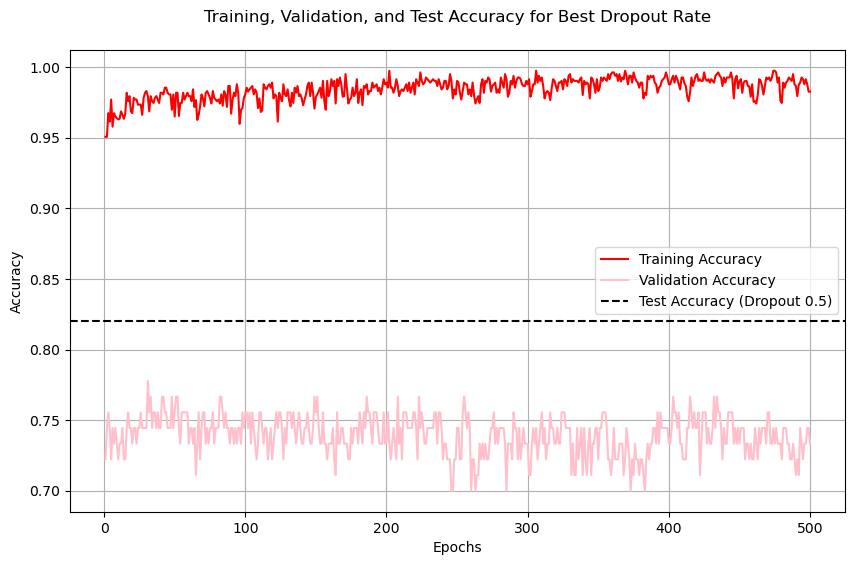

Best Dropout Rate: 0.5, Best Test Accuracy: 82.00%


In [11]:
# Dropout values to test
dropout_values = [0.1, 0.4, 0.5]
test_accuracies = []
results = []

# Step 1: Find the best dropout rate
best_dropout_rate = None
best_test_accuracy = 0.0

for dropout_rate in dropout_values:
    model = NeuralNetwork(input_size, dropout_rate, nn.ReLU).to(device)
    model.load_state_dict(torch.load("eda_nn.pt",map_location=torch.device('cpu')))

    print(f"Training model with dropout rate: {dropout_rate}")

    # Initialize training components
    loss_function = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

    # Training parameters
    num_epochs = 500
    best_validation_accuracy = 0.0

    # Arrays to store metrics
    train_accuracy_array = []
    validation_accuracy_array = []

    # Start timing
    start_time = time.time()

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        batch_accuracies = []

        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

        for i, (batch_X, batch_y) in enumerate(train_loader):
            outputs = model(batch_X)
            loss = loss_function(outputs.squeeze(), batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_validation_tensor)
            val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

            train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
            train_accuracy_array.append(train_accuracy)

            validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
            validation_accuracy_array.append(validation_accuracy.item())
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                      f'Loss: {total_loss / len(train_loader):.4f}, '
                      f'Validation Loss: {val_loss.item():.4f}, '
                      f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

    # Final evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predictions = torch.sigmoid(test_outputs).round()
        test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
        test_accuracies.append(test_accuracy.item())
        print(f"Final Test Accuracy with dropout {dropout_rate}: {test_accuracy * 100:.2f}%")

        # Store results for the current dropout rate
        results.append({
            'Dropout Rate': dropout_rate,
            'Train Accuracy': sum(train_accuracy_array) / len(train_accuracy_array),
            'Validation Accuracy': max(validation_accuracy_array),  # Get the best validation accuracy
            'Test Accuracy': test_accuracy.item()
        })

        # Update the best dropout rate and save the best model only
        if test_accuracy.item() > best_test_accuracy:
            best_test_accuracy = test_accuracy.item()
            best_dropout_rate = dropout_rate
            torch.save(model.state_dict(), "best_dropout")
            print(f'Saving best model with dropout {dropout_rate} and test accuracy {best_test_accuracy:.4f}')

    # End timing
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training completed in {total_time:.2f} seconds.")

# Create and display a DataFrame for results
results_df = pd.DataFrame(results)
print("\nDropout Rate Performance:")
print(results_df)

# Plotting results
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 6))

# Find the index of the best dropout rate
best_dropout_index = dropout_values.index(best_dropout_rate)

plt.plot(epochs[:len(train_accuracy_array)], train_accuracy_array, label='Training Accuracy', color='red')
plt.plot(epochs[:len(validation_accuracy_array)], validation_accuracy_array, label='Validation Accuracy', color='pink')

# Plot test accuracy as a horizontal line
plt.axhline(y=test_accuracies[best_dropout_index], label=f'Test Accuracy (Dropout {best_dropout_rate})', linestyle='--', color='black')

plt.title('Training, Validation, and Test Accuracy for Best Dropout Rate', pad=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Print the best dropout rate
print(f"Best Dropout Rate: {best_dropout_rate}, Best Test Accuracy: {best_test_accuracy * 100:.2f}%")


# Testing with Activation Functions after Loading with Best Dropout Weights


Training model with dropout rate: 0.5 and activation function: ReLU


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2149964657.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_dropout"))  # Load t

Epoch [10/500], Loss: 0.0762, Validation Loss: 3.1894, Validation Accuracy: 74.44%
Epoch [20/500], Loss: 0.0167, Validation Loss: 3.4796, Validation Accuracy: 73.33%
Epoch [30/500], Loss: 0.0185, Validation Loss: 3.4235, Validation Accuracy: 72.22%
Epoch [40/500], Loss: 0.0391, Validation Loss: 3.5632, Validation Accuracy: 71.11%
Epoch [50/500], Loss: 0.0183, Validation Loss: 3.9245, Validation Accuracy: 74.44%
Epoch [60/500], Loss: 0.0189, Validation Loss: 4.0069, Validation Accuracy: 73.33%
Epoch [70/500], Loss: 0.0327, Validation Loss: 3.9251, Validation Accuracy: 71.11%
Epoch [80/500], Loss: 0.0378, Validation Loss: 2.6670, Validation Accuracy: 72.22%
Epoch [90/500], Loss: 0.0276, Validation Loss: 3.1185, Validation Accuracy: 73.33%
Epoch [100/500], Loss: 0.0205, Validation Loss: 3.3348, Validation Accuracy: 73.33%
Epoch [110/500], Loss: 0.0088, Validation Loss: 3.7846, Validation Accuracy: 73.33%
Epoch [120/500], Loss: 0.0262, Validation Loss: 3.5673, Validation Accuracy: 74.44%
E

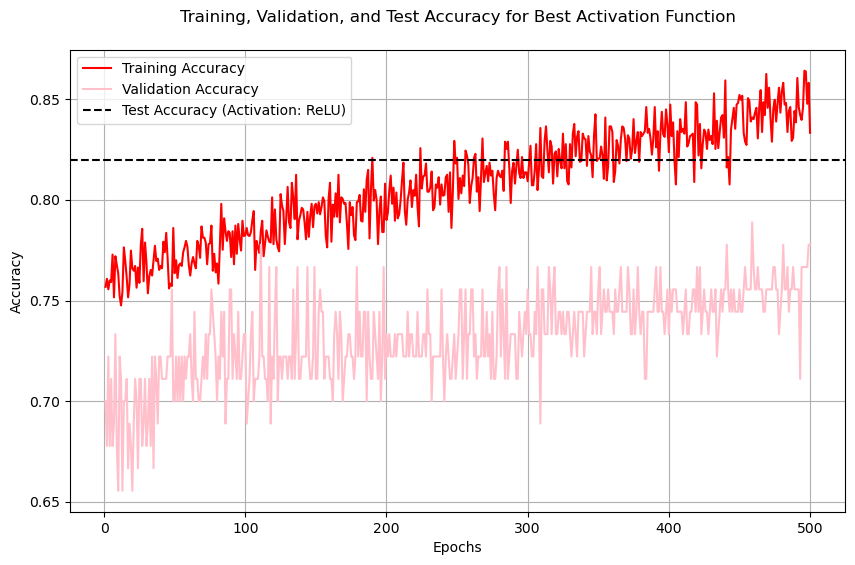


Best activation function: ReLU with test accuracy: 82.00%

Activation Function Performance:
  Activation Function  Train Accuracy  Validation Accuracy  Test Accuracy
0                ReLU  tensor(0.9931)             0.777778           0.82
1           LeakyReLU  tensor(0.9937)             0.777778           0.82
2             Sigmoid  tensor(0.8072)             0.788889           0.73


In [12]:
# Step 2: Train with different activation functions using the best dropout rate
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.Sigmoid]
best_activation_test_accuracy = 0.0
best_activation_function = None

results = []

for activation in activation_functions:
    model = NeuralNetwork(input_size, best_dropout_rate, activation).to(device)
    model.load_state_dict(torch.load("best_dropout"))  # Load the best dropout weights
    print(f"\nTraining model with dropout rate: {best_dropout_rate} and activation function: {activation.__name__}")

    # Initialize training components
    loss_function = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

    # Training parameters
    num_epochs = 500
    best_validation_accuracy = 0.0

    # Arrays to store metrics
    train_accuracy_array = []
    validation_accuracy_array = []

    # Start timing
    start_time = time.time()

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        batch_accuracies = []

        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

        for i, (batch_X, batch_y) in enumerate(train_loader):
            outputs = model(batch_X)
            loss = loss_function(outputs.squeeze(), batch_y)
            optimizer.zero_grad()  # Zero the gradients
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_validation_tensor)
            val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

            train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
            train_accuracy_array.append(train_accuracy)

            validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
            validation_accuracy_array.append(validation_accuracy.item())

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                      f'Loss: {total_loss / len(train_loader):.4f}, '
                      f'Validation Loss: {val_loss.item():.4f}, '
                      f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

            # Save best model for this activation function
            if validation_accuracy.item() > best_validation_accuracy:
                best_validation_accuracy = validation_accuracy.item()

    # End timing
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training completed in {total_time:.2f} seconds.")

    # Final evaluation on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predictions = torch.sigmoid(test_outputs).round()
        test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
        print(f"Final Test Accuracy with activation {activation.__name__}: {test_accuracy * 100:.2f}%")

        # Store results for the current activation function
        results.append({
            'Activation Function': activation.__name__,
            'Train Accuracy': sum(train_accuracy_array) / len(train_accuracy_array),
            'Validation Accuracy': best_validation_accuracy,
            'Test Accuracy': test_accuracy.item()
        })

        # Update the best activation function if current test accuracy is better
        if test_accuracy.item() > best_activation_test_accuracy:
            best_activation_test_accuracy = test_accuracy.item()
            best_activation_function = activation.__name__
            # Save the model only if it's the best activation function found so far
            torch.save(model.state_dict(), "best_activation")
            print(f"New best activation function: {activation.__name__} with test accuracy {best_activation_test_accuracy * 100:.2f}%")

# Plotting results for the best activation function
if best_activation_function is not None:
    epochs = np.arange(1, num_epochs + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs[:len(train_accuracy_array)], train_accuracy_array, label='Training Accuracy', color='red')
    plt.plot(epochs[:len(validation_accuracy_array)], validation_accuracy_array, label='Validation Accuracy', color='pink')
    plt.axhline(y=best_activation_test_accuracy, label=f'Test Accuracy (Activation: {best_activation_function})', linestyle='--', color='black')

    plt.title('Training, Validation, and Test Accuracy for Best Activation Function', pad=20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the best activation function
    print(f"\nBest activation function: {best_activation_function} with test accuracy: {best_activation_test_accuracy * 100:.2f}%")

# Create and display a DataFrame for results
results_df = pd.DataFrame(results)
print("\nActivation Function Performance:")
print(results_df)


# Testing with Optimizers after Loading Best Dropout and Best Activation function


Training model with optimizer: Adam, dropout rate: 0.5, activation function: ReLU


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2724759628.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_activation"))  # Loa

Epoch [10/500], Loss: 0.0141, Validation Loss: 3.7152, Validation Accuracy: 75.56%
Epoch [20/500], Loss: 0.0098, Validation Loss: 3.1977, Validation Accuracy: 74.44%
Epoch [30/500], Loss: 0.0171, Validation Loss: 3.3571, Validation Accuracy: 75.56%
Epoch [40/500], Loss: 0.0053, Validation Loss: 3.8100, Validation Accuracy: 75.56%
Epoch [50/500], Loss: 0.0145, Validation Loss: 3.6822, Validation Accuracy: 76.67%
Epoch [60/500], Loss: 0.0102, Validation Loss: 3.9583, Validation Accuracy: 74.44%
Epoch [70/500], Loss: 0.0114, Validation Loss: 3.3614, Validation Accuracy: 76.67%
Epoch [80/500], Loss: 0.0144, Validation Loss: 4.3598, Validation Accuracy: 76.67%
Epoch [90/500], Loss: 0.0315, Validation Loss: 2.6988, Validation Accuracy: 75.56%
Epoch [100/500], Loss: 0.0190, Validation Loss: 2.9337, Validation Accuracy: 74.44%
Epoch [110/500], Loss: 0.0093, Validation Loss: 3.0561, Validation Accuracy: 74.44%
Epoch [120/500], Loss: 0.0142, Validation Loss: 3.0625, Validation Accuracy: 73.33%
E

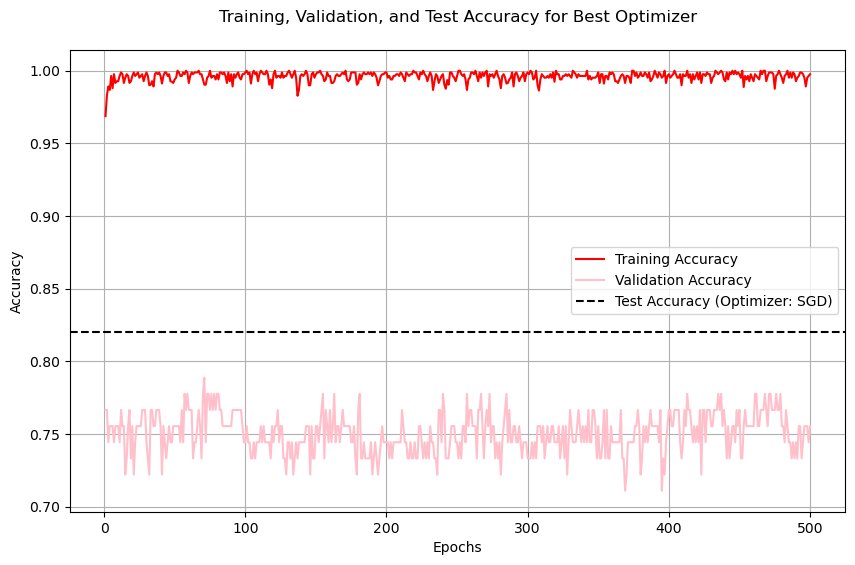


Best optimizer: SGD with test accuracy: 82.00%

Optimizer Performance:
  Optimizer  Train Accuracy  Validation Accuracy  Test Accuracy
0      Adam  tensor(0.9951)             0.777778           0.80
1       SGD  tensor(0.9984)             0.766667           0.82
2   RMSprop  tensor(0.9961)             0.788889           0.82


In [13]:
# Step 3: Train with different optimizers using the best dropout rate and activation function
optimizers = [
    ("Adam", optim.Adam),
    ("SGD", optim.SGD),
    ("RMSprop", optim.RMSprop)
]
results = []

best_optimizer_test_accuracy = 0.0
best_optimizer_name = None

for optimizer_name, optimizer_class in optimizers:
    model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
    model.load_state_dict(torch.load("best_activation"))  # Load the best activation function weights
    print(f"\nTraining model with optimizer: {optimizer_name}, dropout rate: {best_dropout_rate}, activation function: {best_activation_function}")

    # Initialize training components
    loss_function = nn.BCEWithLogitsLoss()
    optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=1e-5)
    binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

    # Training parameters
    num_epochs = 500
    best_validation_accuracy = 0.0

    # Arrays to store metrics
    train_accuracy_array = []
    validation_accuracy_array = []

    # Start timing
    start_time = time.time()

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        batch_accuracies = []

        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

        for i, (batch_X, batch_y) in enumerate(train_loader):
            outputs = model(batch_X)
            loss = loss_function(outputs.squeeze(), batch_y)
            optimizer.zero_grad()  # Zero the gradients
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_validation_tensor)
            val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

            train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
            train_accuracy_array.append(train_accuracy)

            validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
            validation_accuracy_array.append(validation_accuracy.item())

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                      f'Loss: {total_loss / len(train_loader):.4f}, '
                      f'Validation Loss: {val_loss.item():.4f}, '
                      f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

            # Save best model for this optimizer
            if validation_accuracy.item() > best_validation_accuracy:
                best_validation_accuracy = validation_accuracy.item()
                # Save only the best optimizer's weights
                if optimizer_name == best_optimizer_name:
                    torch.save(model.state_dict(), "base_model")
                    print(f'Saving improved model at epoch {epoch + 1} with validation accuracy {best_validation_accuracy:.4f}')

    # End timing
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training completed in {total_time:.2f} seconds.")

    # Final evaluation on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predictions = torch.sigmoid(test_outputs).round()
        test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
        print(f"Final Test Accuracy with optimizer {optimizer_name}: {test_accuracy * 100:.2f}%")

        # Store results for the current optimizer
        results.append({
            'Optimizer': optimizer_name,
            'Train Accuracy': sum(train_accuracy_array) / len(train_accuracy_array),
            'Validation Accuracy': best_validation_accuracy,
            'Test Accuracy': test_accuracy.item()
        })

        # Update the best optimizer if current test accuracy is better
        if test_accuracy.item() > best_optimizer_test_accuracy:
            best_optimizer_test_accuracy = test_accuracy.item()
            best_optimizer_name = optimizer_name
            torch.save(model.state_dict(), "base_model")  # Save the best optimizer's weights as 'base_model'
            print(f"New best optimizer: {optimizer_name} with test accuracy {best_optimizer_test_accuracy * 100:.2f}%")

# Plotting results for the best optimizer
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs[:len(train_accuracy_array)], train_accuracy_array, label='Training Accuracy', color='red')
plt.plot(epochs[:len(validation_accuracy_array)], validation_accuracy_array, label='Validation Accuracy', color='pink')
plt.axhline(y=best_optimizer_test_accuracy, label=f'Test Accuracy (Optimizer: {best_optimizer_name})', linestyle='--', color='black')

plt.title('Training, Validation, and Test Accuracy for Best Optimizer', pad=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Print the best optimizer
print(f"\nBest optimizer: {best_optimizer_name} with test accuracy: {best_optimizer_test_accuracy * 100:.2f}%")

# Create and display a DataFrame for results
results_df = pd.DataFrame(results)
print("\nOptimizer Performance:")
print(results_df)


# Base_model obtained, Running for comparision with Performance tuning

C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\644878248.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("base_model"))  # Load the b

Saving improved model at epoch 1 with validation accuracy 0.7667
Epoch [10/500], Loss: 0.0034, Validation Loss: 3.8025, Validation Accuracy: 76.67%
Epoch [20/500], Loss: 0.0062, Validation Loss: 3.8106, Validation Accuracy: 76.67%
Epoch [30/500], Loss: 0.0020, Validation Loss: 3.8233, Validation Accuracy: 76.67%
Epoch [40/500], Loss: 0.0069, Validation Loss: 3.8288, Validation Accuracy: 76.67%
Epoch [50/500], Loss: 0.0013, Validation Loss: 3.8243, Validation Accuracy: 76.67%
Epoch [60/500], Loss: 0.0014, Validation Loss: 3.8294, Validation Accuracy: 76.67%
Epoch [70/500], Loss: 0.0058, Validation Loss: 3.8311, Validation Accuracy: 76.67%
Epoch [80/500], Loss: 0.0011, Validation Loss: 3.8422, Validation Accuracy: 76.67%
Epoch [90/500], Loss: 0.0014, Validation Loss: 3.8403, Validation Accuracy: 76.67%
Epoch [100/500], Loss: 0.0018, Validation Loss: 3.8691, Validation Accuracy: 76.67%
Epoch [110/500], Loss: 0.0075, Validation Loss: 3.8798, Validation Accuracy: 76.67%
Epoch [120/500], Los

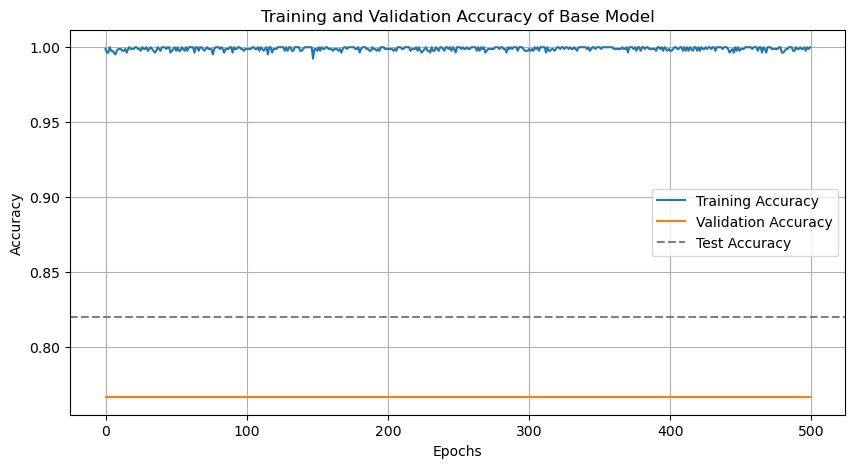

In [15]:
# Load the base_model weights
model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
model.load_state_dict(torch.load("base_model"))  # Load the best optimizer's weights (base_model)

# Initialize training components
loss_function = nn.BCEWithLogitsLoss()
optimizer_class = getattr(optim, best_optimizer_name)  # Get the best optimizer class by name
optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=1e-5)  # Initialize the optimizer
binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

# Training parameters
num_epochs = 500
best_validation_accuracy = 0.0

# Arrays to store metrics
train_accuracy_array = []
validation_accuracy_array = []

# Start timing the training without early stopping
start_time = time.time()

# Training loop without early stopping
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    batch_accuracies = []
    optimizer.zero_grad()

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

    for i, (batch_X, batch_y) in enumerate(train_loader):
        outputs = model(batch_X)
        loss = loss_function(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()
        batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_validation_tensor)
        val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

        train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
        train_accuracy_array.append(train_accuracy)

        validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
        validation_accuracy_array.append(validation_accuracy.item())

        if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                  f'Loss: {total_loss / len(train_loader):.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

        # Save best model for this optimizer
        if validation_accuracy.item() > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy.item()
            print(f'Saving improved model at epoch {epoch + 1} with validation accuracy {best_validation_accuracy:.4f}')

# End timing for training without early stopping
end_time = time.time()
base_time = end_time - start_time
print(f"Training completed without early stopping in {base_time:.2f} seconds.")

# Final evaluation on test set after training
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
    print(f"Final Test Accuracy after training with base model weights,no performance tuning: {test_accuracy * 100:.2f}%")

# To plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_array, label='Training Accuracy')
plt.plot(validation_accuracy_array, label='Validation Accuracy')
plt.axhline(y=test_accuracy.item(), color='grey', linestyle='--', label='Test Accuracy')  # Add test accuracy line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Base Model')
plt.legend()
plt.grid()
plt.show()

## Early Stopping

Saving improved model at epoch 1 with validation accuracy 0.7667


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\29713045.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("base_model"))  # Load the be

No improvement for 1 epochs.
No improvement for 2 epochs.
No improvement for 3 epochs.
No improvement for 4 epochs.
No improvement for 5 epochs.
No improvement for 6 epochs.
No improvement for 7 epochs.
No improvement for 8 epochs.
Epoch [10/500], Loss: 0.0097, Validation Loss: 3.7982, Validation Accuracy: 76.67%
No improvement for 9 epochs.
No improvement for 10 epochs.
No improvement for 11 epochs.
No improvement for 12 epochs.
No improvement for 13 epochs.
No improvement for 14 epochs.
No improvement for 15 epochs.
Early stopping triggered at epoch 16. Best validation accuracy: 76.67%
Training completed with early stopping in 1.47 seconds.
Final Test Accuracy after early stopping: 82.00%


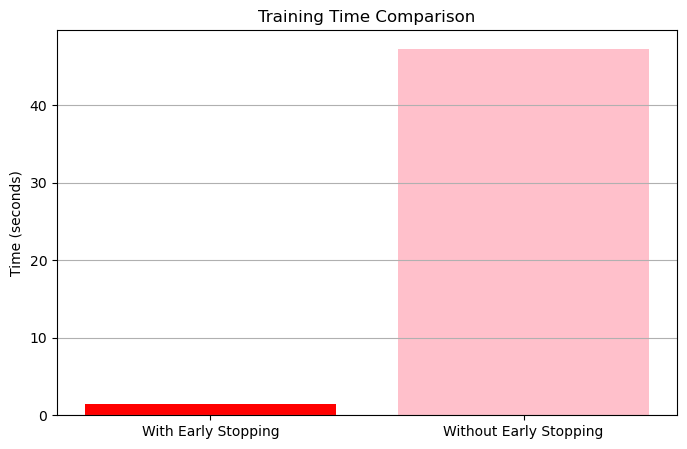

In [16]:
# Load the base_model weights and apply early stopping
patience = 15  # Stop training if no improvement for 15 epochs
min_delta = 0.001  # Minimum improvement threshold to qualify as an improvement

model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
model.load_state_dict(torch.load("base_model"))  # Load the best optimizer's weights (base_model)

# Initialize training components
loss_function = nn.BCEWithLogitsLoss()
optimizer_class = getattr(optim, best_optimizer_name)  # Get the best optimizer class by name
optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=1e-5)  # Initialize the optimizer
binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

# Training parameters
num_epochs = 500
best_validation_accuracy = 0.0
epochs_without_improvement = 0

# Arrays to store metrics
train_accuracy_array = []
validation_accuracy_array = []

# Start timing the training with early stopping
start_time = time.time()

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    batch_accuracies = []
    optimizer.zero_grad()

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = loss_function(outputs.squeeze(), batch_y)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update model parameters
        optimizer.zero_grad()  # Zero gradients for the next iteration

        total_loss += loss.item()
        batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_validation_tensor)
        val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

        train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
        train_accuracy_array.append(train_accuracy)

        validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
        validation_accuracy_array.append(validation_accuracy.item())

        if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                  f'Loss: {total_loss / len(train_loader):.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

        # Early stopping check: if validation accuracy improves, reset patience
        if validation_accuracy.item() > best_validation_accuracy + min_delta:
            best_validation_accuracy = validation_accuracy.item()
            torch.save(model.state_dict(), "early_stopping_best_model")
            print(f'Saving improved model at epoch {epoch + 1} with validation accuracy {best_validation_accuracy:.4f}')
            epochs_without_improvement = 0  # Reset the patience counter
        else:
            epochs_without_improvement += 1  # Increment patience counter
            print(f"No improvement for {epochs_without_improvement} epochs.")

        # Stop training if patience threshold is exceeded
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}. Best validation accuracy: {best_validation_accuracy * 100:.2f}%")
            break

# End timing for training with early stopping
end_time = time.time()
early_stopping_time = end_time - start_time
print(f"Training completed with early stopping in {early_stopping_time:.2f} seconds.")

# Final evaluation on test set after early stopping
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
    print(f"Final Test Accuracy after early stopping: {test_accuracy * 100:.2f}%")
# Plot the training times for comparison
labels = ['With Early Stopping', 'Without Early Stopping']
times = [early_stopping_time, base_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['red', 'pink'])
plt.ylabel('Time (seconds)')
plt.title('Training Time Comparison')
plt.grid(axis='y')
plt.show()


## K-Fold 


Fold 1/5


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2012706312.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("base_model"))  # Load the 

Fold 1 - Epoch [1/500], Validation Loss: 0.0030, Validation Accuracy: 100.00%
Fold 1 - Epoch [2/500], Validation Loss: 0.0036, Validation Accuracy: 100.00%
Fold 1 - Epoch [3/500], Validation Loss: 0.0001, Validation Accuracy: 100.00%
Fold 1 - Epoch [4/500], Validation Loss: 0.0001, Validation Accuracy: 100.00%
Fold 1 - Epoch [5/500], Validation Loss: 0.0025, Validation Accuracy: 100.00%
Fold 1 - Epoch [6/500], Validation Loss: 0.0050, Validation Accuracy: 99.38%
Fold 1 - Epoch [7/500], Validation Loss: 0.0063, Validation Accuracy: 100.00%
Fold 1 - Epoch [8/500], Validation Loss: 0.0054, Validation Accuracy: 100.00%
Fold 1 - Epoch [9/500], Validation Loss: 0.0020, Validation Accuracy: 100.00%
Fold 1 - Epoch [10/500], Validation Loss: 0.0047, Validation Accuracy: 100.00%
Fold 1 - Epoch [11/500], Validation Loss: 0.0031, Validation Accuracy: 100.00%
Fold 1 - Epoch [12/500], Validation Loss: 0.0111, Validation Accuracy: 99.38%
Fold 1 - Epoch [13/500], Validation Loss: 0.0134, Validation Ac

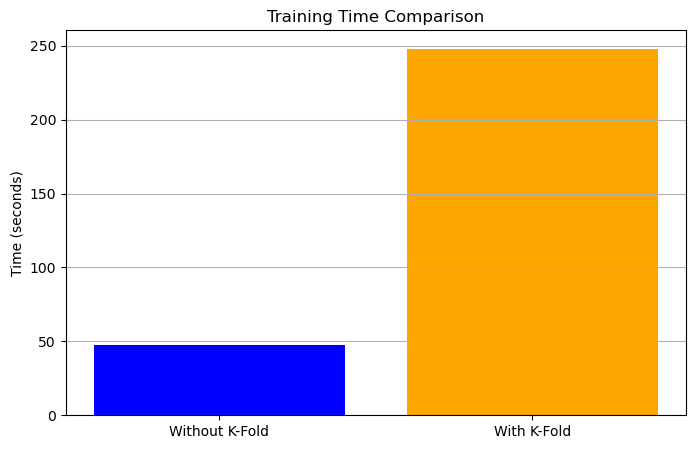

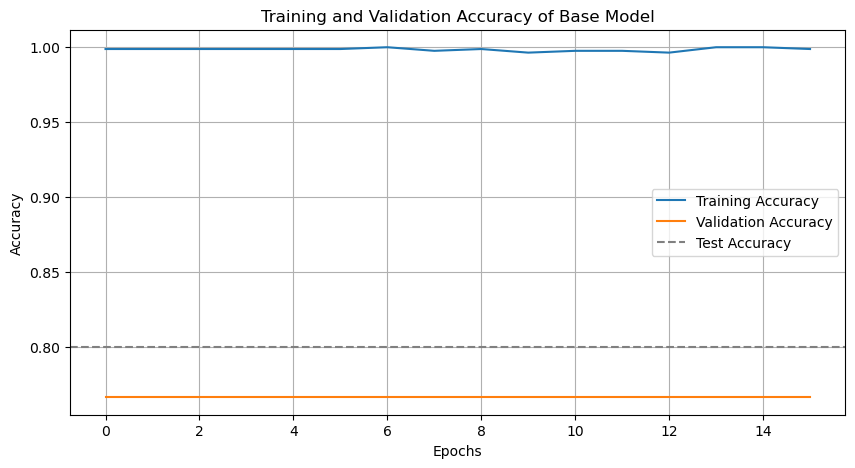

In [17]:
from sklearn.model_selection import KFold

# Load the base_model weights
model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
model.load_state_dict(torch.load("base_model"))  # Load the best weights after optimizer tuning

# Initialize training components
loss_function = nn.BCEWithLogitsLoss()
binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

# Training parameters
num_epochs = 500
k = 5  # Number of folds for k-fold cross-validation

kf = KFold(n_splits=k, shuffle=True)
fold_idx = 1
accuracies = []

# Start timing the k-fold cross-validation
start_time = time.time()

# K-Fold Cross Validation loop
for train_idx, val_idx in kf.split(X_train_tensor):
    print(f"\nFold {fold_idx}/{k}")

    # Split the data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_tensor[train_idx], X_train_tensor[val_idx]
    y_train_fold, y_val_fold = y_train_tensor[train_idx], y_train_tensor[val_idx]

    # Reinitialize the model and optimizer for each fold
    model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
    model.load_state_dict(torch.load("base_model"))  # Reset to base model weights at the start of each fold
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    # Training loop for this fold
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        batch_accuracies = []
        optimizer.zero_grad()

        train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)

        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = loss_function(outputs.squeeze(), batch_y)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            optimizer.zero_grad()  # Reset gradients

            total_loss += loss.item()
            batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

        # Validation phase for this fold
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_fold)
            val_loss = loss_function(val_outputs.squeeze(), y_val_fold)

            validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_val_fold)
            print(f'Fold {fold_idx} - Epoch [{epoch + 1}/{num_epochs}], '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

    
    accuracies.append(validation_accuracy.item())
    print(f"Fold {fold_idx} Validation Accuracy: {validation_accuracy * 100:.2f}%")
    fold_idx += 1


end_time = time.time()
kfold_time = end_time - start_time
print(f"Training completed with k-fold cross-validation in {kfold_time:.2f} seconds.")


average_accuracy = sum(accuracies) / k
print(f"\nAverage Validation Accuracy across {k} folds: {average_accuracy * 100:.2f}%")
torch.save(model.state_dict(), "Kfold_model")

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
    print(f"Final Test Accuracy after k-fold cross-validation: {test_accuracy * 100:.2f}%")

# Plot the training times for comparison
labels = ['Without K-Fold', 'With K-Fold']
times = [base_time, kfold_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Training Time Comparison')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_array, label='Training Accuracy')
plt.plot(validation_accuracy_array, label='Validation Accuracy')
plt.axhline(y=test_accuracy.item(), color='grey', linestyle='--', label='Test Accuracy')  
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Base Model')
plt.legend()
plt.grid()
plt.show()

## Gradient Accumulation

C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2068870319.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("base_model"))  # Load the 

Saving improved model at epoch 1 with validation accuracy 0.7667
Epoch [10/500], Loss: 0.0047, Validation Loss: 3.7978, Validation Accuracy: 76.67%
Epoch [20/500], Loss: 0.0144, Validation Loss: 3.7997, Validation Accuracy: 76.67%
Epoch [30/500], Loss: 0.0018, Validation Loss: 3.8014, Validation Accuracy: 76.67%
Epoch [40/500], Loss: 0.0018, Validation Loss: 3.8068, Validation Accuracy: 76.67%
Epoch [50/500], Loss: 0.0071, Validation Loss: 3.8067, Validation Accuracy: 76.67%
Epoch [60/500], Loss: 0.0024, Validation Loss: 3.8132, Validation Accuracy: 76.67%
Epoch [70/500], Loss: 0.0027, Validation Loss: 3.8134, Validation Accuracy: 76.67%
Epoch [80/500], Loss: 0.0023, Validation Loss: 3.8143, Validation Accuracy: 76.67%
Epoch [90/500], Loss: 0.0058, Validation Loss: 3.8152, Validation Accuracy: 76.67%
Epoch [100/500], Loss: 0.0020, Validation Loss: 3.8254, Validation Accuracy: 76.67%
Epoch [110/500], Loss: 0.0047, Validation Loss: 3.8302, Validation Accuracy: 76.67%
Epoch [120/500], Los

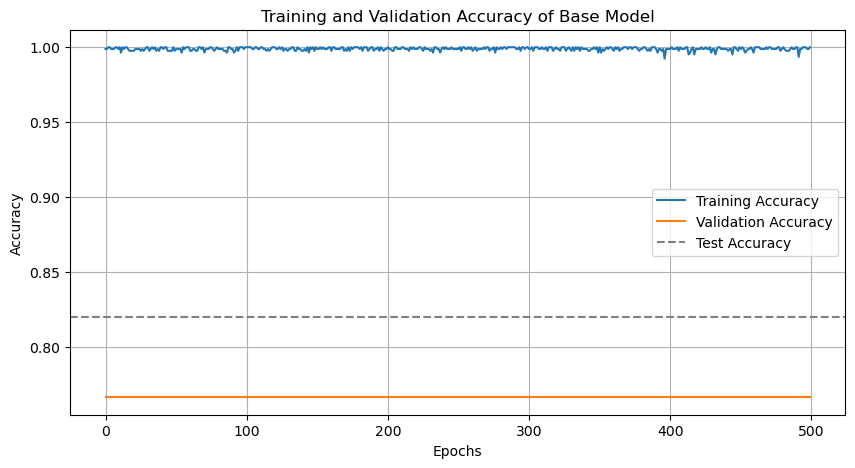

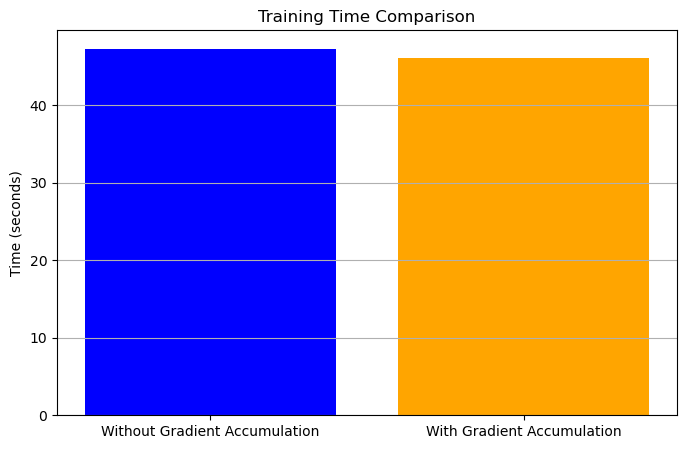

In [18]:
# Load the base_model weights
model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
model.load_state_dict(torch.load("base_model"))  # Load the best optimizer's weights (base_model)

# Initialize training components
loss_function = nn.BCEWithLogitsLoss()
optimizer_class = getattr(optim, best_optimizer_name)  # Get the best optimizer class by name
optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=1e-5)  # Initialize the optimizer
binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

# Training parameters
num_epochs = 500
gradient_accumulation_steps = 4 
best_validation_accuracy = 0.0

# Arrays to store metrics
train_accuracy_array = []
validation_accuracy_array = []

# Start timing the training with gradient accumulation
start_time = time.time()

# Training loop with gradient accumulation
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    batch_accuracies = []
    optimizer.zero_grad()

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

    for i, (batch_X, batch_y) in enumerate(train_loader):
        outputs = model(batch_X)
        loss = loss_function(outputs.squeeze(), batch_y)
        loss = loss / gradient_accumulation_steps  # Normalize loss for gradient accumulation
        loss.backward()  # Backpropagation

        if (i + 1) % gradient_accumulation_steps == 0:
            optimizer.step()  # Update weights
            optimizer.zero_grad()  # Reset gradients

        total_loss += loss.item() * gradient_accumulation_steps
        batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_validation_tensor)
        val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

        train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
        train_accuracy_array.append(train_accuracy)

        validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
        validation_accuracy_array.append(validation_accuracy.item())

        if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                  f'Loss: {total_loss / len(train_loader):.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

        # Save best model for this optimizer
        if validation_accuracy.item() > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy.item()
            torch.save(model.state_dict(), "Gradient_Accumulation_model")
            print(f'Saving improved model at epoch {epoch + 1} with validation accuracy {best_validation_accuracy:.4f}')

# End timing for training with gradient accumulation
end_time = time.time()
gradient_accumulation_time = end_time - start_time
print(f"Training completed with gradient accumulation in {gradient_accumulation_time:.2f} seconds.")

# Final evaluation on test set after training
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
    print(f"Final Test Accuracy after training with gradient accumulation: {test_accuracy * 100:.2f}%")

# To plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_array, label='Training Accuracy')
plt.plot(validation_accuracy_array, label='Validation Accuracy')
plt.axhline(y=test_accuracy.item(), color='grey', linestyle='--', label='Test Accuracy')  # Add test accuracy line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Base Model')
plt.legend()
plt.grid()
plt.show()
# Plot the training times for comparison
labels = ['Without Gradient Accumulation', 'With Gradient Accumulation']
times = [base_time, gradient_accumulation_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Training Time Comparison')
plt.grid(axis='y')
plt.show()


## Learning Rate Scheduler

C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\2842148791.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("base_model"))  # Load the 

Saving improved model at epoch 1 with validation accuracy 0.7667
Learning Rate at Epoch 1: 0.001000
Learning Rate at Epoch 2: 0.001000
Learning Rate at Epoch 3: 0.001000
Learning Rate at Epoch 4: 0.001000
Learning Rate at Epoch 5: 0.001000
Learning Rate at Epoch 6: 0.001000
Learning Rate at Epoch 7: 0.001000
Learning Rate at Epoch 8: 0.001000
Learning Rate at Epoch 9: 0.001000
Epoch [10/500], Loss: 0.0065, Validation Loss: 3.8066, Validation Accuracy: 76.67%
Learning Rate at Epoch 10: 0.001000
Learning Rate at Epoch 11: 0.001000
Learning Rate at Epoch 12: 0.001000
Learning Rate at Epoch 13: 0.001000
Learning Rate at Epoch 14: 0.001000
Learning Rate at Epoch 15: 0.001000
Learning Rate at Epoch 16: 0.001000
Learning Rate at Epoch 17: 0.000100
Learning Rate at Epoch 18: 0.000100
Learning Rate at Epoch 19: 0.000100
Epoch [20/500], Loss: 0.0013, Validation Loss: 3.8177, Validation Accuracy: 76.67%
Learning Rate at Epoch 20: 0.000100
Learning Rate at Epoch 21: 0.000100
Learning Rate at Epoch

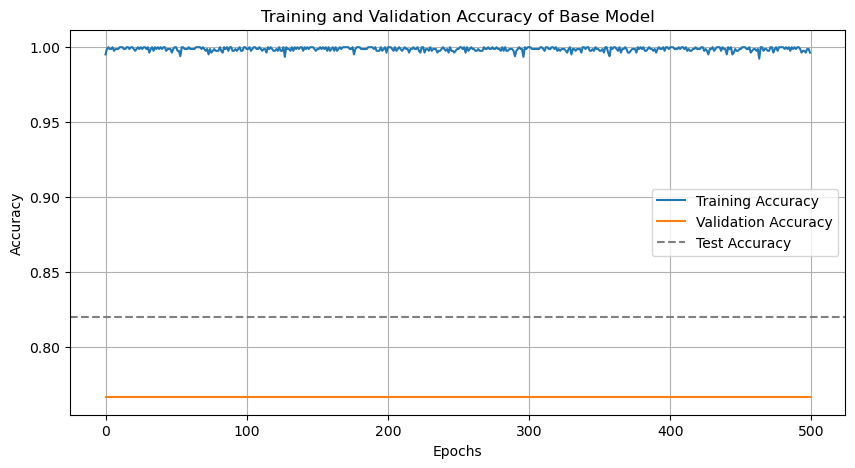

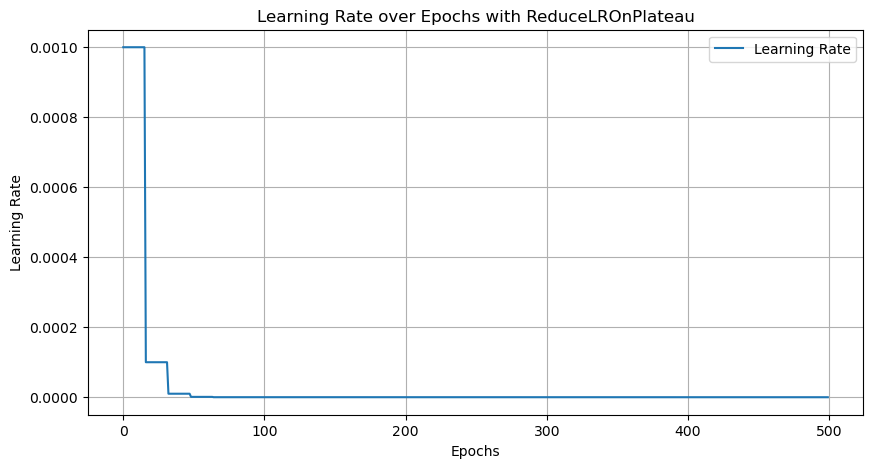

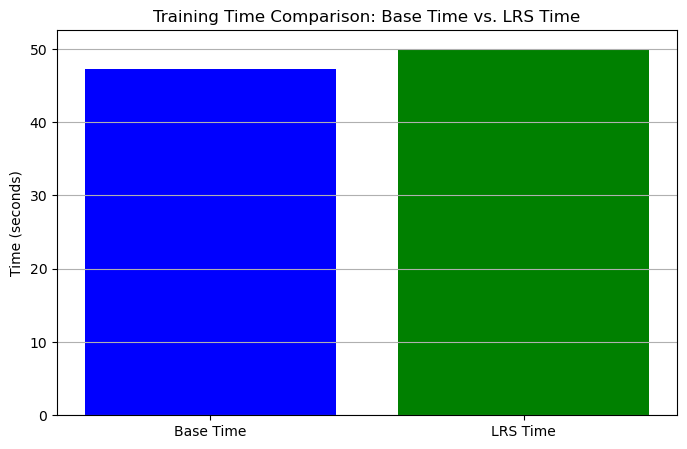

In [19]:
# Load the base_model weights
model = NeuralNetwork(input_size, best_dropout_rate, getattr(nn, best_activation_function)).to(device)
model.load_state_dict(torch.load("base_model"))  # Load the best optimizer's weights (base_model)

# Initialize training components
loss_function = nn.BCEWithLogitsLoss()
optimizer_class = getattr(optim, best_optimizer_name)  # Get the best optimizer class by name
optimizer = optimizer_class(model.parameters(), lr=0.001, weight_decay=1e-5)  # Initialize the optimizer
binary_accuracy = Accuracy(task="binary", threshold=0.5).to(device)

# Initialize ReduceLROnPlateau scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=15, verbose=True)

# Training parameters
num_epochs = 500
best_validation_accuracy = 0.0

# Arrays to store metrics
train_accuracy_array = []
validation_accuracy_array = []
learning_rates = []  # To track the learning rate at each epoch

# Start timing the training
start_time = time.time()

# Training loop with ReduceLROnPlateau
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    batch_accuracies = []
    optimizer.zero_grad()

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

    for i, (batch_X, batch_y) in enumerate(train_loader):
        outputs = model(batch_X)
        loss = loss_function(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()
        batch_accuracies.append(binary_accuracy(outputs.squeeze(), batch_y))

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_validation_tensor)
        val_loss = loss_function(val_outputs.squeeze(), y_validation_tensor)

        train_accuracy = sum(batch_accuracies) / len(batch_accuracies)
        train_accuracy_array.append(train_accuracy)

        validation_accuracy = binary_accuracy(val_outputs.squeeze(), y_validation_tensor)
        validation_accuracy_array.append(validation_accuracy.item())

        if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], '
                  f'Loss: {total_loss / len(train_loader):.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

        # Save best model based on validation accuracy
        if validation_accuracy.item() > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy.item()
            torch.save(model.state_dict(), "LRS_Model")
            print(f'Saving improved model at epoch {epoch + 1} with validation accuracy {best_validation_accuracy:.4f}')

    # Step the learning rate scheduler
    scheduler.step(validation_accuracy.item())  # Monitor validation accuracy
    current_lr = optimizer.param_groups[0]['lr']  # Get current learning rate
    learning_rates.append(current_lr)
    print(f"Learning Rate at Epoch {epoch + 1}: {current_lr:.6f}")

# End timing for training
end_time = time.time()
LRS_time = end_time - start_time
print(f"Training completed without early stopping in {base_time:.2f} seconds.")

# Final evaluation on test set after training
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).round()
    test_accuracy = binary_accuracy(predictions.squeeze(), y_test_tensor)
    print(f"Final Test Accuracy after training: {test_accuracy * 100:.2f}%")

# To plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_array, label='Training Accuracy')
plt.plot(validation_accuracy_array, label='Validation Accuracy')
plt.axhline(y=test_accuracy.item(), color='grey', linestyle='--', label='Test Accuracy')  # Add test accuracy line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Base Model')
plt.legend()
plt.grid()
plt.show()

# Plot learning rates over epochs
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, label='Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Epochs with ReduceLROnPlateau')
plt.legend()
plt.grid()
plt.show()

# Plot the training times for comparison
labels = ['Base Time', 'LRS Time']
times = [base_time, LRS_time]  # Assuming 'base_time' and 'LRS_time' are already defined

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Training Time Comparison: Base Time vs. LRS Time')
plt.grid(axis='y')
plt.show()


In [20]:
torch.load('Gradient_Accumulation_model')
torch.save(model.state_dict(), "optimising_nn.pt")


C:\Users\kiran\AppData\Local\Temp\ipykernel_27988\1426770496.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('Gradient_Accumulation_model')


In [21]:
#removing unnecessary files
weight_files = ['base_model','best_activation','best_dropout','early_stopping_best_model','Kfold_model','LRS_model','Gradient_Accumulation_model']
for file in weight_files:
    if os.path.exists(file):
        os.remove(file)